<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What is Gradient Descent?

Gradient Descent is an optimization algorithm used to minimize a function. In machine learning, this function is typically a **cost function** (or loss function) that measures the error of a model's predictions. The goal is to find the set of model parameters (e.g., weights and biases) that minimizes this cost function.

### Where is Gradient Descent Used in Machine Learning?

Gradient Descent is a fundamental optimization algorithm widely used in various machine learning models, primarily for training. Here are some key areas where it's applied:

*   **Linear Regression:** As demonstrated in this notebook, Gradient Descent is used to find the optimal coefficients (slope `m` and intercept `b`) that minimize the Mean Squared Error (MSE) between predicted and actual values.
*   **Logistic Regression:** For classification tasks, Gradient Descent minimizes the cost function (often cross-entropy loss) to find the best parameters for the logistic regression model.
*   **Neural Networks (Deep Learning):** This is perhaps the most prominent application. Gradient Descent and its variants (like Stochastic Gradient Descent, Adam, RMSprop) are the core algorithms used to train neural networks by updating the weights and biases of the network to minimize the loss function.
*   **Support Vector Machines (SVMs):** While some SVM formulations have analytical solutions, Gradient Descent can be used, especially for large datasets or non-linear SVMs, to find the optimal hyperplane parameters.
*   **Other Machine Learning Models:** Many other models that involve minimizing a cost function to find optimal parameters can employ Gradient Descent or its variations. Essentially, any model where you have a differentiable cost function and adjustable parameters can potentially use Gradient Descent for optimization.

### How Does it Work?

Imagine you are hiking down a mountain in a thick fog, and your goal is to reach the lowest point (the minimum of the cost function). You can only see your immediate surroundings. What do you do?

1.  **Look around**: Determine the steepest downward slope (the **gradient**).
2.  **Take a step**: Move a small distance in that direction.
3.  **Repeat**: Keep taking steps until you can no longer go down, or until the steps become very small.

In mathematical terms, Gradient Descent iteratively adjusts the model's parameters in the direction opposite to the gradient of the cost function with respect to those parameters. The size of each step is determined by a hyperparameter called the **learning rate**.

### Gradient Descent for Linear Regression

For **Linear Regression**, our model is typically represented as `y_pred = mx + b`, where `m` is the slope and `b` is the y-intercept. Our goal is to find the `m` and `b` that best fit our data.

The most common **cost function** for linear regression is the **Mean Squared Error (MSE)**, defined as:

`MSE = (1/N) * Σ(y_i - y_pred_i)^2`

where `N` is the number of data points, `y_i` is the actual value, and `y_pred_i` is the predicted value.

To apply Gradient Descent, we need to calculate the **partial derivatives** of the MSE with respect to `m` and `b`. These derivatives tell us the direction of the steepest ascent. We then move in the opposite direction.

*   **Gradient for `m`**: `∂MSE/∂m = (-2/N) * Σ(x_i * (y_i - y_pred_i))`
*   **Gradient for `b`**: `∂MSE/∂b = (-2/N) * Σ(y_i - y_pred_i)`

The update rules for `m` and `b` are:

*   `m = m - learning_rate * ∂MSE/∂m`
*   `b = b - learning_rate * ∂MSE/∂b`

We repeat these updates for a fixed number of iterations or until the changes in `m` and `b` become very small.

Optimized Slope (m): 2.97
Optimized Intercept (b): 4.40


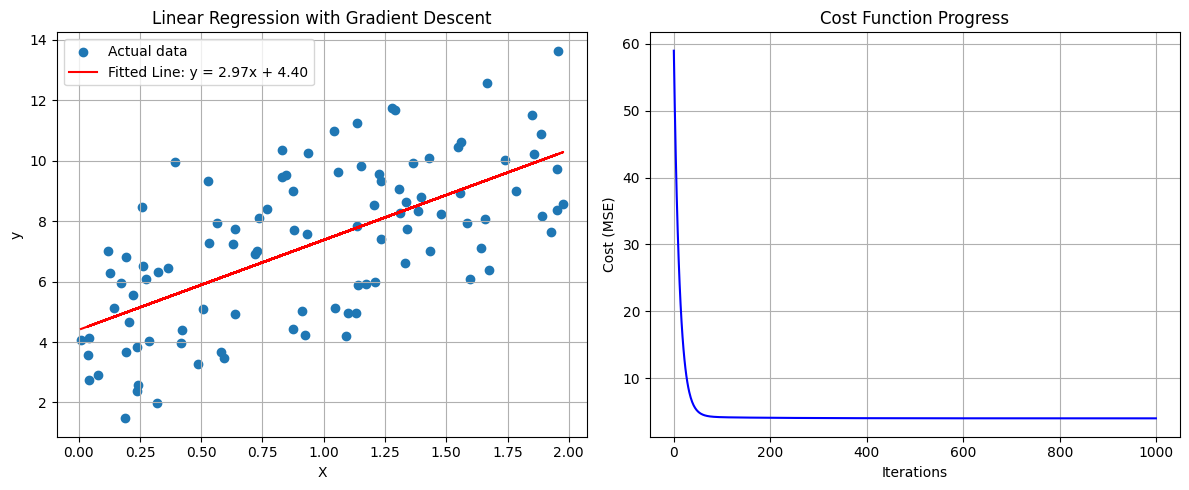

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate some synthetic data for linear regression
np.random.seed(0)
X = 2 * np.random.rand(100, 1) # 100 data points, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1) * 2 # y = 4 + 3X + noise

# Add an intercept term to X (for easier matrix operations if we were to use them, but here we handle 'b' separately)
X_b = np.c_[np.ones((100, 1)), X]

# 2. Initialize parameters (slope 'm' and intercept 'b')
m = 0 # initial slope
b = 0 # initial intercept

# Set hyperparameters
learning_rate = 0.01
n_iterations = 1000
n_samples = len(y)

# Store values for plotting later
m_history = []
b_history = []
cost_history = []

# 3. Perform Gradient Descent
for iteration in range(n_iterations):
    # Calculate predictions
    y_pred = m * X + b

    # Calculate the error
    error = y - y_pred

    # Calculate gradients of the MSE with respect to m and b
    # ∂MSE/∂m = (-2/N) * Σ(x_i * (y_i - y_pred_i))
    d_m = (-2/n_samples) * np.sum(X * error)
    # ∂MSE/∂b = (-2/N) * Σ(y_i - y_pred_i))
    d_b = (-2/n_samples) * np.sum(error)

    # Update parameters
    m = m - learning_rate * d_m
    b = b - learning_rate * d_b

    # Calculate current cost (MSE) and store history
    cost = (1/n_samples) * np.sum(error**2)
    m_history.append(m)
    b_history.append(b)
    cost_history.append(cost)

# 4. Print the optimized parameters
print(f"Optimized Slope (m): {m:.2f}")
print(f"Optimized Intercept (b): {b:.2f}")

# The actual values were m=3 and b=4

# 5. Visualize the results
plt.figure(figsize=(12, 5))

# Plot data and the fitted line
plt.subplot(1, 2, 1)
plt.scatter(X, y, label='Actual data')
plt.plot(X, m * X + b, color='red', label=f'Fitted Line: y = {m:.2f}x + {b:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.grid(True)

# Plot cost history
plt.subplot(1, 2, 2)
plt.plot(cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Progress')
plt.grid(True)

plt.tight_layout()
plt.show()

### Key Considerations:

*   **Learning Rate**: A crucial hyperparameter. If too large, the algorithm might overshoot the minimum; if too small, it will take a very long time to converge.
*   **Local Minima**: For complex cost functions, Gradient Descent might get stuck in a local minimum rather than finding the global minimum. However, for linear regression with MSE, the cost function is convex, guaranteeing convergence to the global minimum.
*   **Variants**: There are several variants like Stochastic Gradient Descent (SGD), Mini-batch Gradient Descent, Adam, RMSprop, etc., which differ in how they calculate and apply gradients (e.g., using subsets of data instead of the full dataset for each update).

In [ ]:
import numpy as np

# Data
X = np.array([1, 2, 3, 4, 5])
y = np.array([3, 6, 9, 12, 15])

# Initialize
w = 0
b = 0
lr = 0.01
epochs = 1000
n = len(X)

for _ in range(epochs):
    y_pred = w * X + b

    dw = (-2/n) * np.sum(X * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)

    w = w - lr * dw
    b = b - lr * db

print("Weight:", w)
print("Bias:", b)


Weight: 2.9927705260079667
Bias: 0.026100695010915737


In [ ]:
for i in range(n):
    y_pred = w * X[i] + b


In [ ]:
import numpy as np

# Dataset
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Initialize parameters
w = 0.0
b = 0.0
lr = 0.01
epochs = 1000
n = len(X)

# Gradient Descent
for _ in range(epochs):
    y_pred = w * X + b

    dw = (-2/n) * np.sum(X * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)

    w -= lr * dw
    b -= lr * db

print("Final Weight:", w)
print("Final Bias:", b)


Final Weight: 1.9951803506719779
Final Bias: 0.017400463340610635


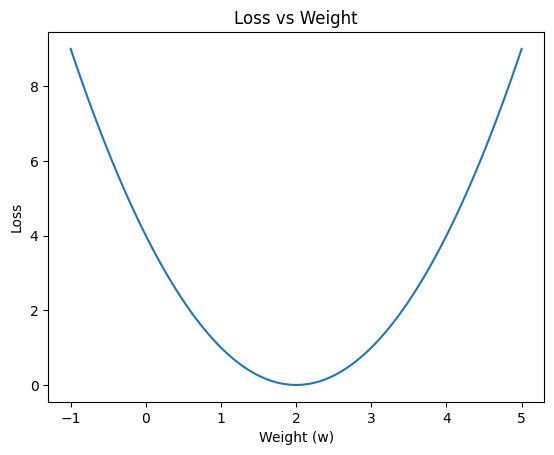

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w_values = np.linspace(-1, 5, 100)
loss = [(w-2)**2 for w in w_values]  # parabola

plt.plot(w_values, loss)
plt.xlabel("Weight (w)")
plt.ylabel("Loss")
plt.title("Loss vs Weight")
plt.show()


In [ ]:
from sklearn.datasets import make_regression
import numpy as np

In [ ]:
X,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)


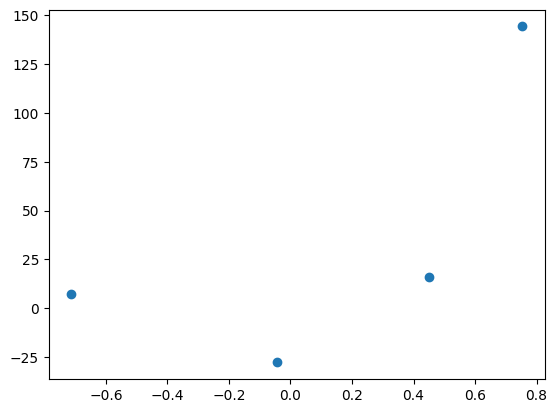

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [ ]:
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None)

LinearRegression()

In [ ]:
reg.coef_

array([78.35063668])

In [ ]:
reg.intercept_

np.float64(26.15963284313262)

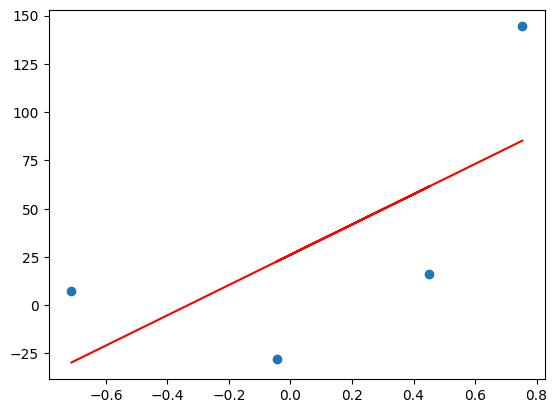

In [ ]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [ ]:
y_pred=((78.35*X)+0).reshape(4)

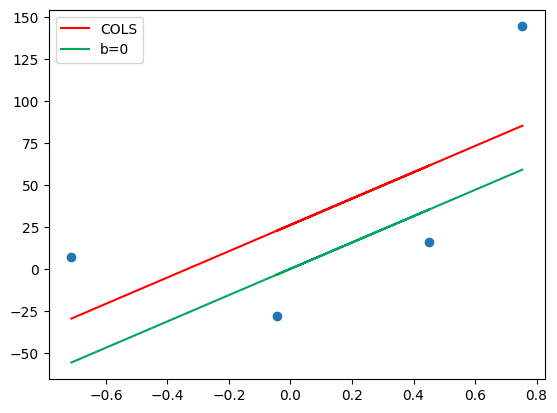

In [ ]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='COLS')
plt.plot(X,y_pred,color="#00a65a",label='b=0')
plt.legend()
plt.show()

##Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate some synthetic data for linear regression
np.random.seed(0)
X = 2 * np.random.rand(100, 1) # 100 data points, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1) * 2 # y = 4 + 3X + noise

**1. Data Generation:**

- `import numpy as np` and `import matplotlib.pyplot as plt`: Imports the necessary libraries for numerical operations (`numpy`) and plotting (`matplotlib`).
- `np.random.seed(0)`: Sets the random seed for reproducibility, ensuring that the generated 'random' data is the same every time the code runs.
- `X = 2 * np.random.rand(100, 1)`: Creates 100 random numbers between 0 and 2 for our input feature `X`.
- `y = 4 + 3 * X + np.random.randn(100, 1) * 2`: Generates the target variable `y` based on a linear relationship (`y = 4 + 3X`) and adds some random noise (`np.random.randn(100, 1) * 2`) to make the data more realistic. The true slope is 3 and the true intercept is 4.

In [2]:
# 2. Initialize parameters (slope 'm' and intercept 'b')
m = 0 # initial slope
b = 0 # initial intercept

# Set hyperparameters
learning_rate = 0.01
n_iterations = 1000
n_samples = len(y)

# Store values for plotting later
m_history = []
b_history = []
cost_history = []

**2. Initialization:**

- `m = 0`, `b = 0`: The model's parameters (slope `m` and intercept `b`) are initialized to zero. Gradient Descent will then iteratively adjust these values to find the best fit.
- `learning_rate = 0.01`: This is a crucial hyperparameter. It determines the size of the steps taken during each iteration. A small learning rate makes the algorithm slow, while a large one might cause it to overshoot the minimum.
- `n_iterations = 1000`: The number of times the Gradient Descent algorithm will update the parameters.
- `n_samples = len(y)`: Stores the number of data points, used for calculating averages in the cost function and gradients.
- `m_history`, `b_history`, `cost_history`: Empty lists are created to store the values of `m`, `b`, and the cost (Mean Squared Error) at each iteration. This allows us to visualize the training progress later.

In [3]:
# 3. Perform Gradient Descent
for iteration in range(n_iterations):
    # Calculate predictions
    y_pred = m * X + b

    # Calculate the error
    error = y - y_pred

    # Calculate gradients of the MSE with respect to m and b
    # ∂MSE/∂m = (-2/N) * Σ(x_i * (y_i - y_pred_i))
    d_m = (-2/n_samples) * np.sum(X * error)
    # ∂MSE/∂b = (-2/N) * Σ(y_i - y_pred_i))
    d_b = (-2/n_samples) * np.sum(error)

    # Update parameters
    m = m - learning_rate * d_m
    b = b - learning_rate * d_b

    # Calculate current cost (MSE) and store history
    cost = (1/n_samples) * np.sum(error**2)
    m_history.append(m)
    b_history.append(b)
    cost_history.append(cost)

**3. Gradient Descent Loop:**

- `for iteration in range(n_iterations):`: This loop runs for the specified number of iterations, performing the core Gradient Descent steps.
- `y_pred = m * X + b`: Calculates the predicted `y` values using the current `m` and `b`.
- `error = y - y_pred`: Computes the difference between the actual `y` values and the predicted `y` values. This is the residual or error.
- `d_m = (-2/n_samples) * np.sum(X * error)`: Calculates the partial derivative of the Mean Squared Error (MSE) cost function with respect to `m`. This gradient indicates the direction of the steepest ascent for `m`.
- `d_b = (-2/n_samples) * np.sum(error)`: Calculates the partial derivative of the MSE with respect to `b`. This gradient indicates the direction of the steepest ascent for `b`.
- `m = m - learning_rate * d_m`: Updates `m` by moving in the opposite direction of its gradient, scaled by the `learning_rate`. This reduces the cost.
- `b = b - learning_rate * d_b`: Updates `b` in a similar fashion.
- `cost = (1/n_samples) * np.sum(error**2)`: Calculates the Mean Squared Error for the current iteration and stores it in `cost_history` along with `m` and `b`.

In [4]:
# 4. Print the optimized parameters
print(f"Optimized Slope (m): {m:.2f}")
print(f"Optimized Intercept (b): {b:.2f}")

# The actual values were m=3 and b=4

Optimized Slope (m): 2.97
Optimized Intercept (b): 4.40


**4. Print Optimized Parameters:**

- After the loop finishes, the final `m` and `b` values are printed. These are the optimized parameters that Gradient Descent found to minimize the MSE. Comparing them to the actual values (`m=3`, `b=4`) shows how well the algorithm converged.

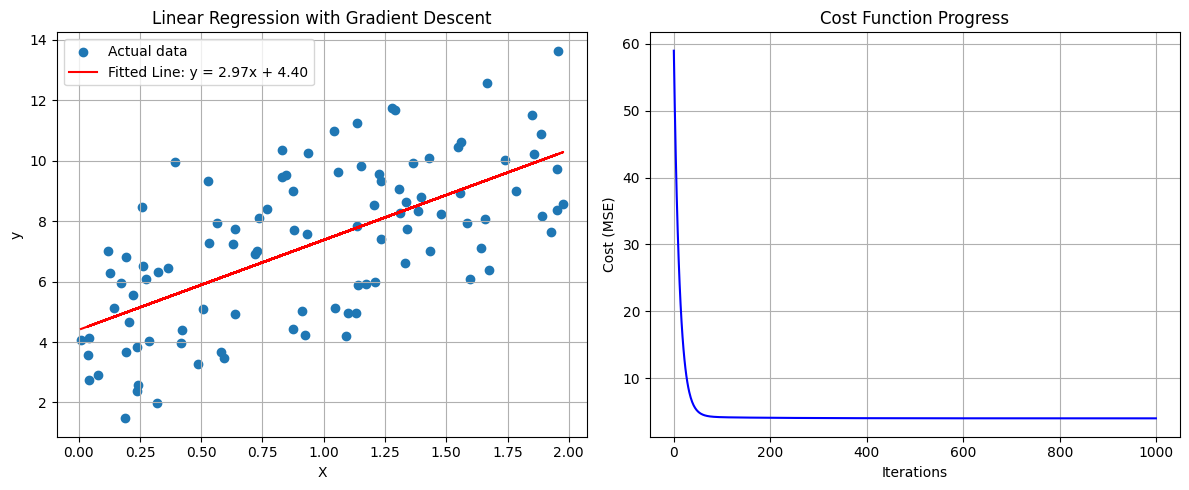

In [5]:
# 5. Visualize the results
plt.figure(figsize=(12, 5))

# Plot data and the fitted line
plt.subplot(1, 2, 1)
plt.scatter(X, y, label='Actual data')
plt.plot(X, m * X + b, color='red', label=f'Fitted Line: y = {m:.2f}x + {b:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.grid(True)

# Plot cost history
plt.subplot(1, 2, 2)
plt.plot(cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Progress')
plt.grid(True)

plt.tight_layout()
plt.show()

**5. Visualization:**

- Two plots are generated:
    - **Left Plot (Fitted Line):** Shows the original synthetic data points (`plt.scatter`) and the final linear regression line (`plt.plot`) determined by the optimized `m` and `b`. This visually represents how well the model fits the data.
    - **Right Plot (Cost Function Progress):** Displays the `cost_history` over the iterations. You should see the cost decreasing over time, demonstrating that Gradient Descent is successfully minimizing the cost function. If the learning rate is appropriate, the cost will converge to a minimum value.

#🔹 Program 1: Simple Linear Regression using Gradient Descent (From Scratch)

In [6]:
import numpy as np

# Input data
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

n = len(X)


🧮 Cost Function (MSE)

In [7]:
def compute_cost(m, b, X, y):
    y_pred = m * X + b
    cost = (1/(2*n)) * np.sum((y_pred - y) ** 2)
    return cost


Let's explain the `compute_cost` function:

```python
def compute_cost(m, b, X, y):
    y_pred = m * X + b
    cost = (1/(2*n)) * np.sum((y_pred - y) ** 2)
    return cost
```

- `def compute_cost(m, b, X, y):`:
    - This line defines a function named `compute_cost` that takes four arguments:
        - `m`: The current slope of the linear regression line.
        - `b`: The current y-intercept of the linear regression line.
        - `X`: The input features (independent variable).
        - `y`: The actual target values (dependent variable).

- `y_pred = m * X + b`:
    - This line calculates the predicted `y` values (`y_pred`) based on the current slope (`m`), intercept (`b`), and input features (`X`). This is the linear equation: `y = mx + b`.

- `cost = (1/(2*n)) * np.sum((y_pred - y) ** 2)`:
    - This is the core of the Mean Squared Error (MSE) calculation.
        - `(y_pred - y)`: Calculates the difference between the predicted values (`y_pred`) and the actual values (`y`). This is the error or residual for each data point.
        - `(y_pred - y) ** 2`: Squares each of these errors. Squaring ensures that all errors are positive and penalizes larger errors more heavily.
        - `np.sum(...)`: Sums up all the squared errors.
        - `(1/(2*n)) * ...`: Divides the sum of squared errors by `2*n` (where `n` is the number of samples). The `1/2` factor is often included in the cost function for convenience in differentiation (it cancels out when computing the gradient), and `1/n` normalizes the cost by the number of samples, giving the average squared error. Together, `(1/(2*n))` computes the average squared error divided by 2.

- `return cost`:
    - The function returns the calculated `cost` (MSE) value. This value represents how well the current line (`m` and `b`) fits the data; a lower cost indicates a better fit.

🔁 Gradient Descent Algorithm

In [8]:
def gradient_descent(X, y, m, b, learning_rate, iterations):
    for i in range(iterations):
        y_pred = m * X + b

        dm = (1/n) * np.sum((y_pred - y) * X)
        db = (1/n) * np.sum(y_pred - y)

        m = m - learning_rate * dm
        b = b - learning_rate * db

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {compute_cost(m, b, X, y):.4f}")

    return m, b


Let's explain the `gradient_descent` function:

```python
def gradient_descent(X, y, m, b, learning_rate, iterations):
    for i in range(iterations):
        y_pred = m * X + b

        dm = (1/n) * np.sum((y_pred - y) * X)
        db = (1/n) * np.sum(y_pred - y)

        m = m - learning_rate * dm
        b = b - learning_rate * db

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {compute_cost(m, b, X, y):.4f}")

    return m, b
```

- `def gradient_descent(X, y, m, b, learning_rate, iterations):`:
    - This defines the `gradient_descent` function, which takes the following arguments:
        - `X`: The input features.
        - `y`: The actual target values.
        - `m`: The initial slope.
        - `b`: The initial y-intercept.
        - `learning_rate`: A hyperparameter controlling the step size during updates.
        - `iterations`: The number of times to update the parameters.

- `for i in range(iterations):`:
    - This loop runs for the specified number of `iterations`. Each iteration involves calculating predictions, computing gradients, and updating parameters.

- `y_pred = m * X + b`:
    - Inside each iteration, the model first calculates its current predictions (`y_pred`) based on the current `m` and `b` values.

- `dm = (1/n) * np.sum((y_pred - y) * X)`:
    - This calculates the gradient of the cost function with respect to `m`. It tells us how much the cost function changes if `m` is changed. This specific formula is derived from the partial derivative of the Mean Squared Error (MSE) cost function.

- `db = (1/n) * np.sum(y_pred - y)`:
    - This calculates the gradient of the cost function with respect to `b`. Similarly, it indicates how much the cost changes with `b`.

- `m = m - learning_rate * dm`:
    - This is the parameter update step for `m`. The `learning_rate` scales the gradient (`dm`). We subtract the scaled gradient because we want to move in the *opposite* direction of the steepest ascent (i.e., towards the minimum).

- `b = b - learning_rate * db`:
    - This is the parameter update step for `b`, similar to the update for `m`.

- `if i % 100 == 0:`:
    - This conditional statement checks if the current iteration `i` is a multiple of 100. This is used to print the cost periodically, so you can track the learning progress without overwhelming the output.

- `print(f"Iteration {i}: Cost = {compute_cost(m, b, X, y):.4f}")`:
    - If the condition is met, it prints the current iteration number and the calculated cost using the `compute_cost` function (which was defined separately).

- `return m, b`:
    - After all iterations are complete, the function returns the final, optimized values of `m` and `b`.

In [9]:
m = 0
b = 0
learning_rate = 0.01
iterations = 1000

m, b = gradient_descent(X, y, m, b, learning_rate, iterations)

print("Final slope (m):", m)
print("Final intercept (b):", b)


Iteration 0: Cost = 6.8101
Iteration 100: Cost = 0.4707
Iteration 200: Cost = 0.4045
Iteration 300: Cost = 0.3573
Iteration 400: Cost = 0.3236
Iteration 500: Cost = 0.2996
Iteration 600: Cost = 0.2825
Iteration 700: Cost = 0.2703
Iteration 800: Cost = 0.2616
Iteration 900: Cost = 0.2554
Final slope (m): 0.6963550004885218
Final intercept (b): 1.8521278749603411


Let's explain the execution of the Gradient Descent:

```python
m = 0
b = 0
learning_rate = 0.01
iterations = 1000

m, b = gradient_descent(X, y, m, b, learning_rate, iterations)

print("Final slope (m):", m)
print("Final intercept (b):", b)
```

- `m = 0`, `b = 0`:
    - These lines re-initialize the slope (`m`) and intercept (`b`) to zero before starting the Gradient Descent process. This ensures a fresh start for the optimization.

- `learning_rate = 0.01`:
    - Sets the learning rate for the Gradient Descent algorithm. This value controls the step size taken during each parameter update.

- `iterations = 1000`:
    - Defines the total number of iterations (epochs) the Gradient Descent algorithm will run.

- `m, b = gradient_descent(X, y, m, b, learning_rate, iterations)`:
    - This line calls the `gradient_descent` function (which was defined earlier). It passes the input data (`X`, `y`), the initial `m` and `b` values, the `learning_rate`, and the `iterations`.
    - The function then runs the optimization process and returns the final, optimized values for `m` and `b`, which are then assigned back to the `m` and `b` variables.

- `print("Final slope (m):", m)`:
- `print("Final intercept (b):", b)`:
    - These lines print the final optimized values of the slope (`m`) and intercept (`b`) that the Gradient Descent algorithm found after completing all iterations. These values define the best-fit line according to the model.

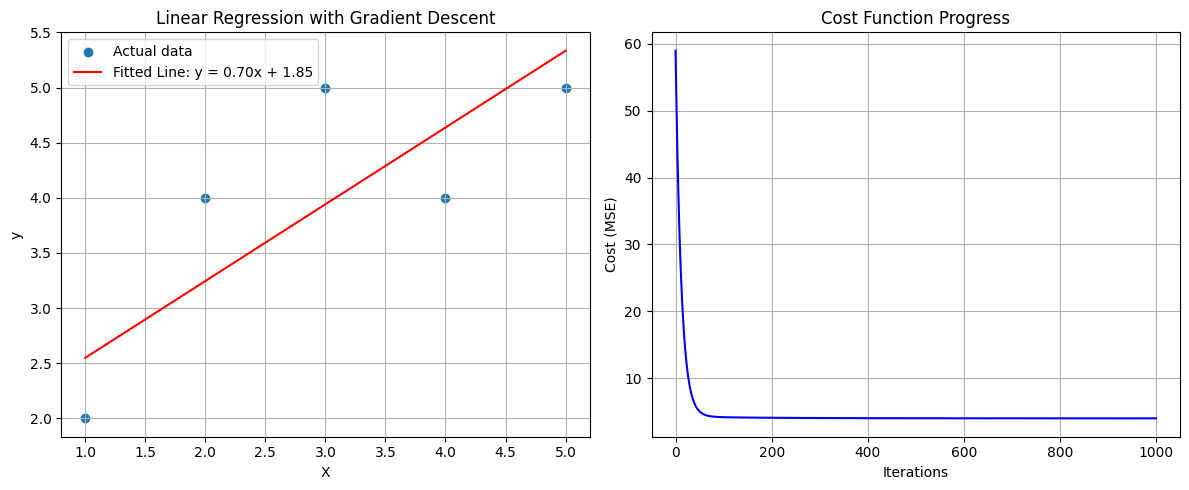

In [10]:
import matplotlib.pyplot as plt

# 5. Visualize the results
plt.figure(figsize=(12, 5))

# Plot data and the fitted line
plt.subplot(1, 2, 1)
plt.scatter(X, y, label='Actual data')
plt.plot(X, m * X + b, color='red', label=f'Fitted Line: y = {m:.2f}x + {b:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.grid(True)

# Plot cost history
plt.subplot(1, 2, 2)
plt.plot(cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Progress')
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
def predict(X, m, b):
    return m * X + b

predictions = predict(X, m, b)
print("Predicted values:", predictions)


Predicted values: [2.54848288 3.24483788 3.94119288 4.63754788 5.33390288]


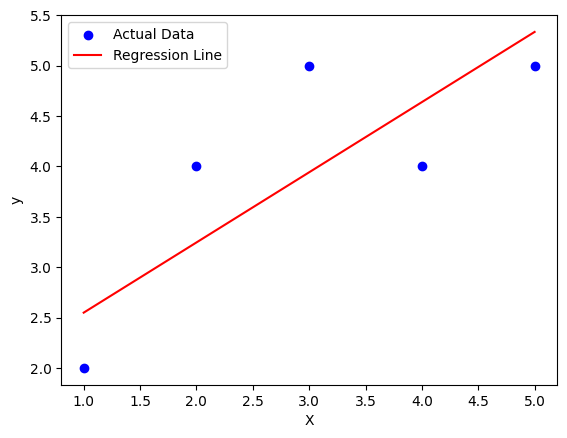

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, predictions, color='red', label='Regression Line')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [13]:
m = 0
b = 0
lr = 0.01

for i in range(5):
    y_pred = m * X + b
    dm = (1/n) * np.sum((y_pred - y) * X)
    db = (1/n) * np.sum(y_pred - y)

    m -= lr * dm
    b -= lr * db

    print(f"Step {i+1}: m={m:.3f}, b={b:.3f}")


Step 1: m=0.132, b=0.040
Step 2: m=0.248, b=0.076
Step 3: m=0.351, b=0.107
Step 4: m=0.441, b=0.136
Step 5: m=0.520, b=0.161


In [14]:
from sklearn.metrics import mean_squared_error

y_pred = m * X + b
print("MSE:", mean_squared_error(y, y_pred))


MSE: 5.680924329233724


#Logistic Regression

In [18]:
def logistic_gradient_descent(X, y, w, b, learning_rate, iterations):
    n = len(X)

    for i in range(iterations):

        # 1️⃣ Linear combination
        z = w * X + b

        # 2️⃣ Sigmoid activation
        y_pred = 1 / (1 + np.exp(-z))

        # 3️⃣ Compute gradients
        dw = (1/n) * np.sum((y_pred - y) * X)
        db = (1/n) * np.sum(y_pred - y)

        # 4️⃣ Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # 5️⃣ Print loss occasionally
        if i % 100 == 0:
            loss = -np.mean(
                y * np.log(y_pred + 1e-15) +
                (1 - y) * np.log(1 - y_pred + 1e-15)
            )
            print(f"Iteration {i}: Loss = {loss:.4f}")

    return w, b


🔹 Step 1: Linear Combination

In [20]:
z = w * X + b


🔹 Step 2: Sigmoid Function

In [21]:
y_pred = 1 / (1 + np.exp(-z))


🔹 Step 3: Gradient Calculation

In [22]:
dw = (1/n) * np.sum((y_pred - y) * X)
db = (1/n) * np.sum(y_pred - y)


🔹 Step 4: Parameter Update

In [23]:
w = w - learning_rate * dw
b = b - learning_rate * db


🔹 Step 5: Loss Monitoring

In [25]:
loss = -np.mean(
    y * np.log(y_pred + 1e-15) +
    (1 - y) * np.log(1 - y_pred + 1e-15)
)

In [26]:
# Initialize parameters for Logistic Regression
w = 0
b = 0
learning_rate = 0.1
iterations = 1000

# Run Logistic Gradient Descent
w_optimized, b_optimized = logistic_gradient_descent(X, y, w, b, learning_rate, iterations)

print(f"Optimized Weight (w): {w_optimized:.4f}")
print(f"Optimized Bias (b): {b_optimized:.4f}")

Iteration 0: Loss = 0.6931
Iteration 100: Loss = 0.4680
Iteration 200: Loss = 0.3649
Iteration 300: Loss = 0.3062
Iteration 400: Loss = 0.2680
Iteration 500: Loss = 0.2410
Iteration 600: Loss = 0.2207
Iteration 700: Loss = 0.2047
Iteration 800: Loss = 0.1916
Iteration 900: Loss = 0.1807
Optimized Weight (w): 1.7690
Optimized Bias (b): -5.9564


In [27]:
from sklearn.metrics import accuracy_score

# Calculate predictions using the optimized w and b
z_final = w_optimized * X + b_optimized
y_pred_proba = 1 / (1 + np.exp(-z_final))

# Convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
y_pred_class = (y_pred_proba >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_class)

print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 1.0000
